<a href="https://colab.research.google.com/github/Tusharsd123/students/blob/master/MNIST(Fashion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import,division,print_function,unicode_literals

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

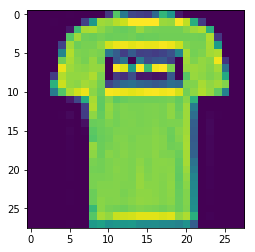

In [46]:
plt.imshow(train_images[1])

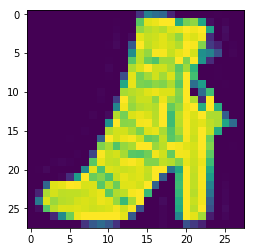

In [47]:
plt.imshow(train_images[11])

In [0]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [50]:
train_images.shape

(60000, 28, 28)

In [51]:
len(train_labels)

60000

In [52]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [53]:
test_images.shape

(10000, 28, 28)

In [54]:
len(test_labels)

10000

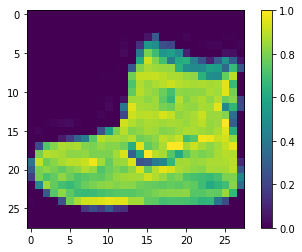

In [55]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

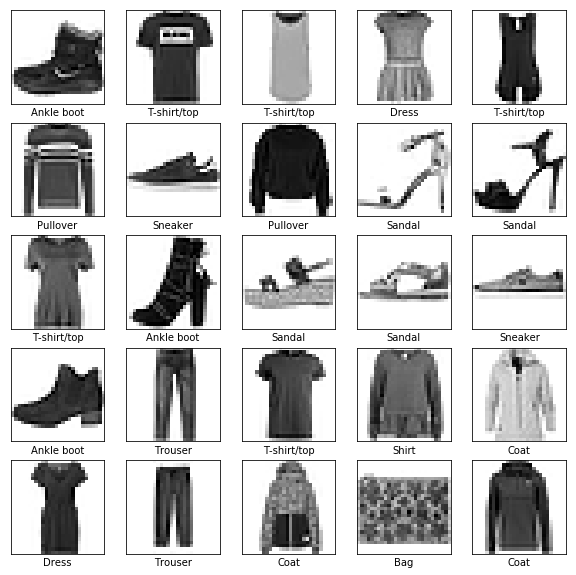

In [56]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()  

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [59]:
model.fit(train_images,train_labels,epochs=6)

Epoch 1/6
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5004 - acc: 0.8240
Epoch 2/6
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3787 - acc: 0.8628
Epoch 3/6
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3395 - acc: 0.8769
Epoch 4/6
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3146 - acc: 0.8846
Epoch 5/6
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2970 - acc: 0.8903
Epoch 6/6
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2802 - acc: 0.8957


In [0]:
predictions = model.predict(test_images)

In [61]:
predictions[0]

array([5.1186743e-07, 2.0784059e-08, 1.5295849e-07, 2.7739765e-07,
       2.6655160e-08, 1.0048838e-02, 1.8143537e-06, 4.1710973e-02,
       5.5245687e-06, 9.4823188e-01], dtype=float32)

In [62]:
np.argmax(predictions[0])

9

In [63]:
test_labels[0]

9

In [0]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label= np.argmax(predictions_array)
  if predicted_label == true_label:
      color='blue'
  else:
      color='red'
      
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

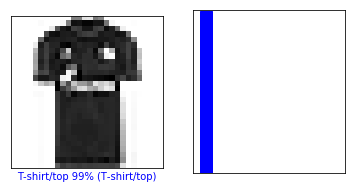

In [87]:
i = 889
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

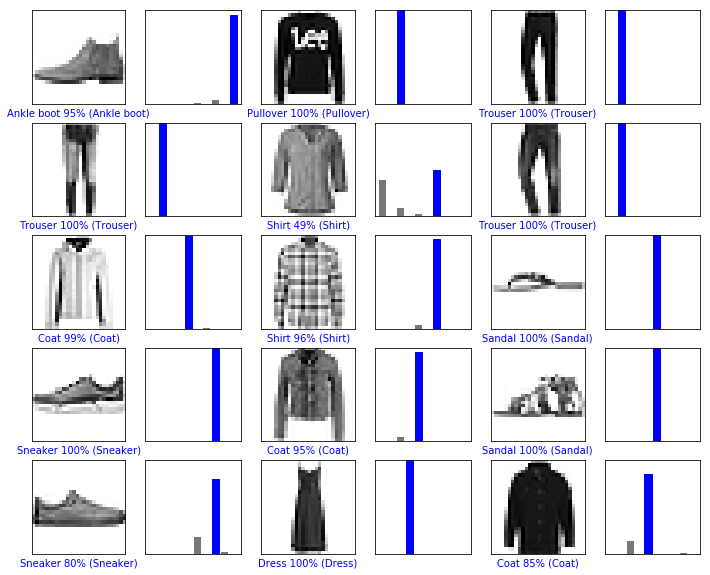

In [88]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [90]:
img = test_images[0]
print(img.shape)

(28, 28)


In [91]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [92]:
predictions_single = model.predict(img)
print(predictions_single)

[[5.1186788e-07 2.0784059e-08 1.5295863e-07 2.7739790e-07 2.6655160e-08
  1.0048834e-02 1.8143520e-06 4.1710973e-02 5.5245737e-06 9.4823188e-01]]


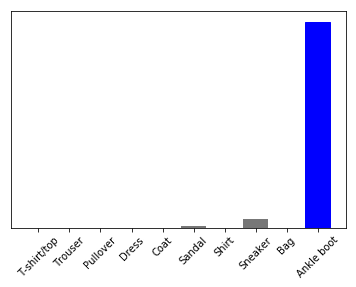

In [93]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [94]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
